# Input data

Text(0, 0.5, 'Second feature')

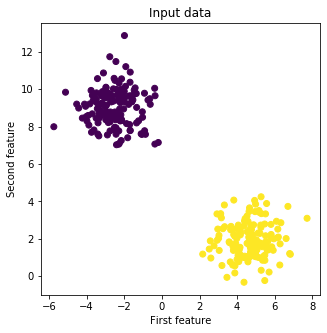

In [2]:
from sklearn.datasets.samples_generator import make_blobs
import matplotlib.pyplot as plt
import numpy as np

X,y = make_blobs(n_samples = 300, centers = 2, random_state = 42)

plt.figure(figsize=(5,5))
plt.title("Input data")
plt.scatter(X[:,0], X[:,1], c = y)
plt.xlabel("First feature")
plt.ylabel("Second feature")

# Train and test separation

In [3]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

print("Shape of train data: {}".format(X_train.shape))
print("Shape of test data: {}".format(X_test.shape))

Shape of train data: (225, 2)
Shape of test data: (75, 2)


# Neural network training

In [10]:
# Neural network architecture: 2-3-3

class MyNet:
    def __init__(self):
        
        self.learning_rate = 0.1

        # Weights after input layer
        self.w1 = np.array([[-0.1, 0.2, 0.4], 
                            [-0.3, 0.4, -0.3]])

        # Weights before output layer
        self.w2 = np.array([[-0.4, 0.5],
                            [-0.1, 0.2],
                            [-0.3, 0.5]]) 

    # Activation function
    def activation_function(self, data):
        return 1 / (1 + np.exp(-data))

    # Derivative of function
    def derivative_of_function(self, y):
        return y * (1 - y)

    # Forward propagation function
    def forward_propagation(self, input_data):

        # Between input and hidden layer
        net_on_hidden_layer = np.dot(input_data, self.w1)
        y_on_hidden_layer = self.activation_function(net_on_hidden_layer)

        # Between hidden and output layer
        net_on_output_layer = np.dot(y_on_hidden_layer, self.w2)
        y_on_output_layer = self.activation_function(net_on_output_layer)

        return y_on_output_layer, y_on_hidden_layer

    # Neural network training
    def neural_network_training(self, input_data, y_true):

        y_on_output_layer, y_on_hidden_layer = self.forward_propagation(input_data)

        # Back propagation function (Error-Correction)
        if y_true == 0: y_true_output = [1, 0] 
        else: y_true_output = [0, 1] 

        d_output = y_true - y_on_output_layer
        d_hidden = np.dot(d_output,np.transpose(self.w2))

        self.w1 = self.w1 + d_hidden * self.derivative_of_function(y_on_hidden_layer) * input_data.reshape(2,1) * self.learning_rate 
        self.w2 = self.w2 + d_output * self.derivative_of_function(y_on_output_layer) * y_on_hidden_layer.reshape(3,1) * self.learning_rate 
    
num_epoch = 100
net = MyNet()
for i in range(0, num_epoch, 1):
    for j in range(0, len(y_train), 1):
        net.neural_network_training(X_train[j], y_train[j])
        
y_pred = []
for k in range(0, len(y_test), 1):
    answer,_ = net.forward_propagation(X_test[k])
    y_pred.append(np.argmax(answer))
    
print("ОК")

ОК


# Results

Text(0, 0.5, 'Second feature')

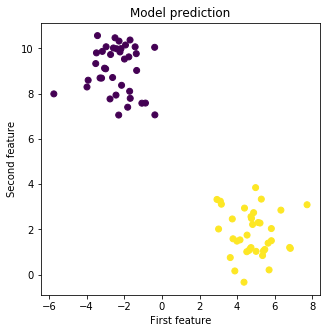

In [11]:
plt.figure(figsize=(5,5))
plt.title("Model prediction")
plt.scatter(X_test[:,0], X_test[:,1], c = y_pred)
plt.xlabel("First feature")
plt.ylabel("Second feature")